# Probabilidad y Estadística para la Inteligencia Artificial - CEIA Coh17 (UBA)
### EXAMEN FINAL

Grupo 3 - Integrantes:
* Luciano Adassus (luciano106@gmail.com)
* Ignacio Tomas	 de Pedro Mermier (idepedro@fi.uba.ar)
* Agustina Quiros (agustinaqr@gmail.com)

Siguiendo con la historia de Don Francisco, con el tiempo y gracias a los análisis de Matías, el pequeño comerciante de barrio cuenta hoy con 5 supermercados: ’Santa Ana’, ’La Floresta’, ’Los Cedros’, ’Palermo’ y ’Córdoba’.
También Matías ha avanzado en la Especialización en Inteligencia Artificial. Un día Don Francisco le plantea algunas inquietudes adicionales:

1. Don Francisco quiere entender mejor las ventas por mes del supermercado ’Santa Ana’.
2. Más aún, Don Francisco no sabe si puede estar seguro de que las ventas son las mismas en todos los supermercados o si hay alguno que se comporte mejor que los demás, y si alguna de las tiendas necesita más atención porque sus ventas sean peores que las de las otras.
3. Don Francisco tiene 9 clientes a los que les ha vendido mercancías a crédito y, de ellos, 2 están en mora con el pago prometido. Matías, teniendo en cuenta la información disponible, considera que puede modelar el porcentaje $p$ de morosidad según una distribución $ \beta (1, 4)$. Para determinar los parámetros $\alpha$ y $\beta$, decide usar inferencia bayesiana. Con esto, pretende explicarle a Don Francisco, cómo será el comportamiento de pago de sus clientes a crédito.

Con base en lo anterior,

1. (2.5 puntos) Determinen intervalos de confianza empíricos para el supermercado ’Santa Ana’ en cada mes, para significancias del 95 % y el 99 %.
2. (2.5 puntos) Realicen pruebas ANOVA para determinar si las ventas esperadas de todas las tiendas son iguales o no, con significancia del 95.
3. (2.5 puntos) Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen una prueba de hipótesis para determinar si la diferencia entre ellas es distinta de cero o no.
4. (2.5 puntos) Determinen la distribución a posteriori del parámetro $p$ de porcentaje de morosidad. Determinar su media y su varianza.

Librerías necesarias

In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gaussian_kde, beta
from scipy import stats

sns.set(style="dark")

Adquisicion de datos

In [50]:
# Verificar si el archivo existe (el archivo deberia estar en el mismo directorio mismo lugar que el file de jupiter)
file_path = 'Datos_examen_final_17Co2024_Grupo3.xlsx'
if not os.path.exists(file_path):
    print(f"Error: El archivo {file_path} no se encuentra en el directorio actual.")
else:
    # Cargar los datos
    # Santa Ana
    try:
        data_santa_ana = pd.read_excel(file_path,'Santa Ana')
    except Exception as e:
        print(e)

    # La Floresta
    try:
        data_la_floresta = pd.read_excel(file_path,'La Floresta')
    except Exception as e:
        print(e)

    # Los Cedros
    try:
        data_los_cedros = pd.read_excel(file_path,'Los Cedros')
    except Exception as e:
        print(e)

    # Palermo
    try:
        data_palermo = pd.read_excel(file_path,'Palermo')
    except Exception as e:
        print(e)

    # Cordoba
    try:
        data_cordoba = pd.read_excel(file_path,'Córdoba')
    except Exception as e:
        print(e)

data = {
    'santa_ana':data_santa_ana,
    'la_floresta':data_la_floresta,
    'los_cedros':data_los_cedros,
    'palermo':data_palermo,
    'cordoba':data_cordoba,
}

In [51]:
print(data_santa_ana)
print(data_la_floresta)
print(data_los_cedros)
print(data_palermo)
print(data_cordoba)

         Fecha        Ventas
0   2023-01-01  16243.573114
1   2023-01-02  18362.442131
2   2023-01-03  15275.825306
3   2023-01-04  20177.937740
4   2023-01-05  20489.996198
..         ...           ...
360 2023-12-27  22248.978258
361 2023-12-28  26784.345674
362 2023-12-29  21542.037841
363 2023-12-30  16736.910287
364 2023-12-31  16741.394821

[365 rows x 2 columns]
         Fecha        Ventas
0   2023-01-01  11924.438317
1   2023-01-02  14930.219757
2   2023-01-03  11240.900202
3   2023-01-04  13911.829250
4   2023-01-05  16242.232761
..         ...           ...
360 2023-12-27  22760.094716
361 2023-12-28  20175.278191
362 2023-12-29  19542.088108
363 2023-12-30  15816.723324
364 2023-12-31  12760.390473

[365 rows x 2 columns]
         Fecha        Ventas
0   2023-01-01  13235.877810
1   2023-01-02  16966.244236
2   2023-01-03  18996.614391
3   2023-01-04  19743.233354
4   2023-01-05  14338.706842
..         ...           ...
360 2023-12-27  19194.405746
361 2023-12-28  19863.11

In [52]:
# Estadisticos de cada una
estadisticos = {}
for df in data:
    estadisticos[df] = {
        'mean':data[df]['Ventas'].mean(),
        'std': data[df]['Ventas'].std()
    }
estadisticos

{'santa_ana': {'mean': 21842.40281907045, 'std': 3018.576700076473},
 'la_floresta': {'mean': 18049.110514295746, 'std': 3291.7620300733083},
 'los_cedros': {'mean': 19713.103882712614, 'std': 3180.846855864971},
 'palermo': {'mean': 18851.655317704222, 'std': 2901.678222495838},
 'cordoba': {'mean': 21784.303604300352, 'std': 2906.830253794191}}

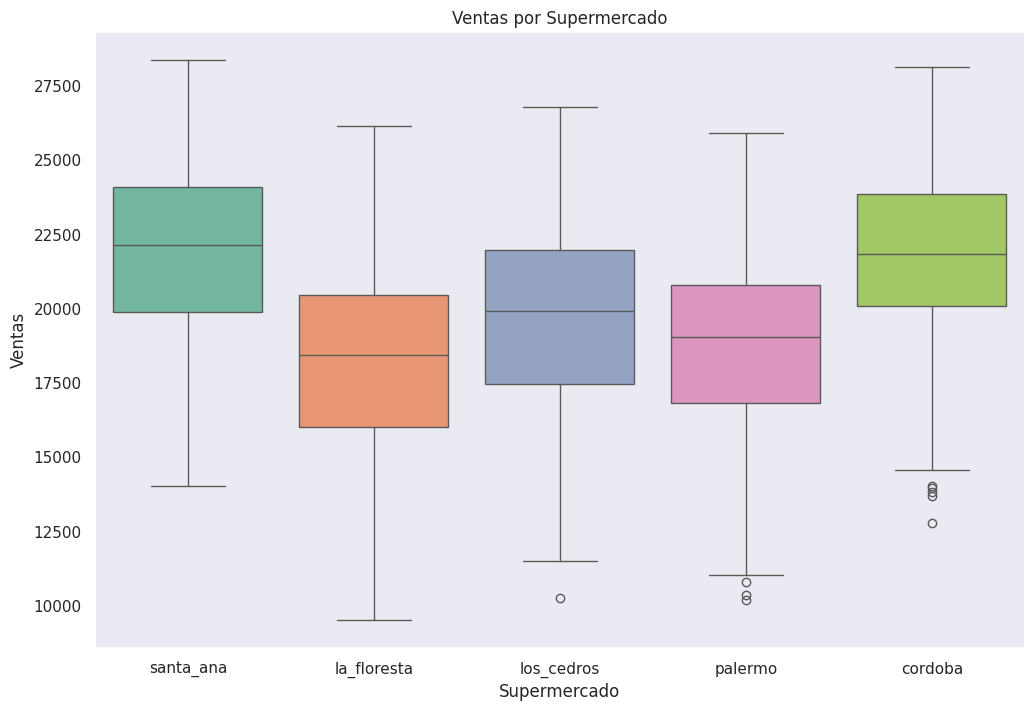

In [63]:
combined_data = pd.concat(data.values(), keys=data.keys(), names=['Supermercado'])
combined_data = combined_data.reset_index(level=0)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Supermercado', y='Ventas', data=combined_data, hue='Supermercado', palette='Set2', legend=False)
plt.xlabel('Supermercado')
plt.ylabel('Ventas')
plt.title('Ventas por Supermercado')
plt.show()

# Ejercicio 1.  Intervalos de Confianza
Intervalos de confianza empíricos para el supermercado ’Santa Ana’ en cada mes, para significancias del 95 % y el 99 %.

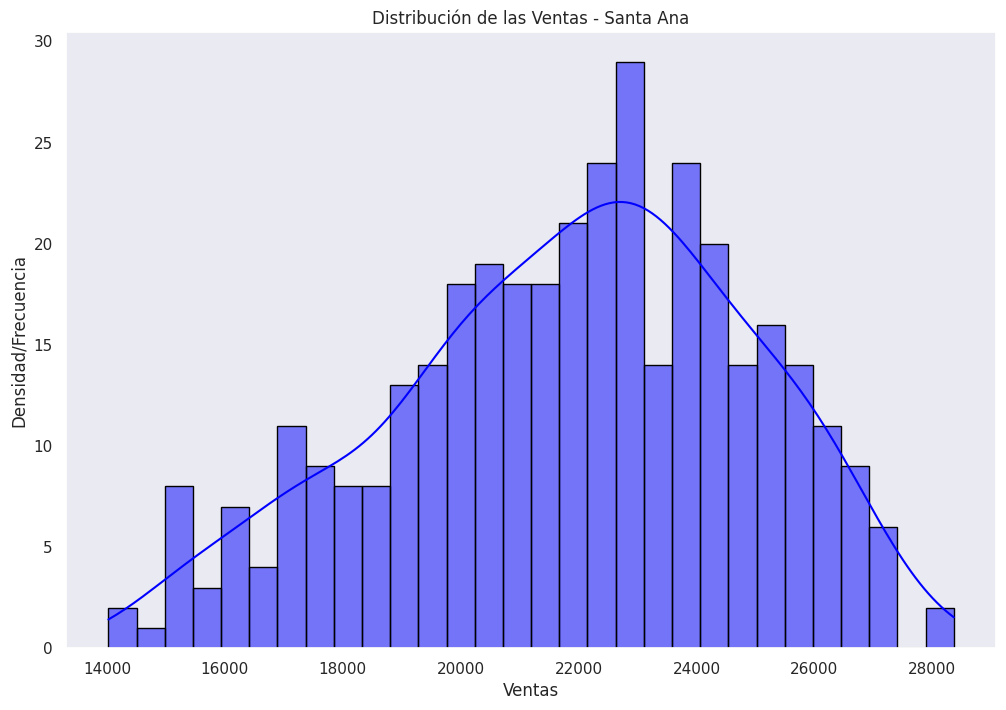

In [64]:
plt.figure(figsize=(12, 8))
sns.histplot(data_santa_ana['Ventas'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribución de las Ventas - Santa Ana')
plt.xlabel('Ventas')
plt.ylabel('Densidad/Frecuencia')
plt.show()

Observando el histograma de las _ventas del supermercado Santa Ana_, los datos parecen seguir una **Distribución Normal**. La forma de campana simétrica indica que los valores tienden a agruparse alrededor de la media, con una disminución gradual hacia los extremos, lo cual es característico de una distribución normal. Dado este análisis, se asume que los datos tienen una Distribución Normal y realizamos los cálculos utilizando `scipy.stats.norm` de la biblioteca SciPy en Python que representa una distribución normal o gaussiana.

In [69]:
data_santa_ana['Fecha'] = pd.to_datetime(data_santa_ana['Fecha'])
data_santa_ana['Mes'] = data_santa_ana['Fecha'].dt.to_period('M')

# Agrupar por mes y calcular la media y el error estándar de las ventas
monthly_stats = data_santa_ana.groupby('Mes')['Ventas'].agg(['mean', 'count', 'std'])
monthly_stats['sem'] = monthly_stats['std'] / np.sqrt(monthly_stats['count'])

# 95% y 99%
confidence_levels = [0.95, 0.99]
for cl in confidence_levels:
    # Convertir el nivel de confianza en porcentaje
    ci_column = f'ci_{int(cl*100)}'
    # valor crítico z para el nivel de confianza
    z = stats.norm.ppf((1 + cl) / 2)
    # margen de error
    monthly_stats[ci_column] = monthly_stats['sem'] * z
    # limites
    monthly_stats[f'lower_{int(cl*100)}'] = monthly_stats['mean'] - monthly_stats[ci_column]
    monthly_stats[f'upper_{int(cl*100)}'] = monthly_stats['mean'] + monthly_stats[ci_column]

In [73]:
# Estilizar el DataFrame
styled_df = (monthly_stats[['mean', 'lower_95', 'upper_95', 'lower_99', 'upper_99']]
  .style
  .format(precision=2)
  .set_caption("""
   <h3><span>Intervalos de confianza empíricos para el supermercado Santa Ana
              para significancias del 95 % y el 99 %</span><br></h3>
   """)
  .highlight_max(color='darkblue')
)

styled_df

,mean,lower_95,upper_95,lower_99,upper_99
Mes,,,,,
2023-01,17882.63,17003.06,18762.19,16726.68,19038.57
2023-02,20489.72,19375.60,21603.84,19025.52,21953.93
2023-03,22400.07,21441.87,23358.28,21140.78,23659.37
2023-04,20803.36,19758.43,21848.29,19430.09,22176.63
2023-05,22083.22,21335.29,22831.16,21100.27,23066.17
2023-06,23823.73,23005.40,24642.06,22748.26,24899.20
2023-07,21751.22,20769.91,22732.54,20461.56,23040.89
2023-08,23477.39,22456.53,24498.24,22135.75,24819.02
2023-09,23113.91,22402.60,23825.21,22179.09,24048.72


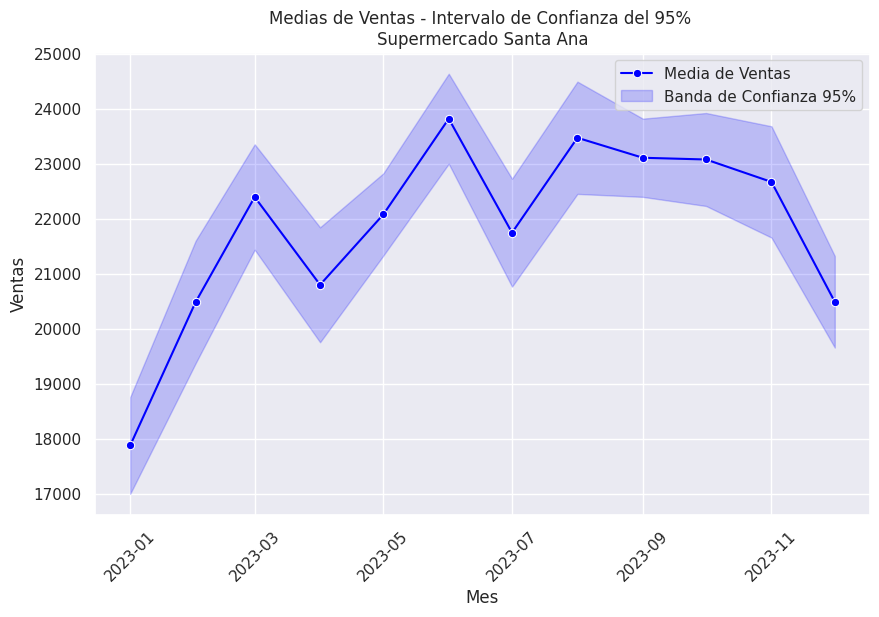

In [78]:
#monthly_stats.index = monthly_stats.index.to_timestamp()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_stats.index, y=monthly_stats['mean'], marker='o', color='blue', label='Media de Ventas')


plt.fill_between(monthly_stats.index,
                 monthly_stats['lower_95'],
                 monthly_stats['upper_95'],
                 color='blue', alpha=0.2, label='Banda de Confianza 95%')

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Medias de Ventas - Intervalo de Confianza del 95% \nSupermercado Santa Ana')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


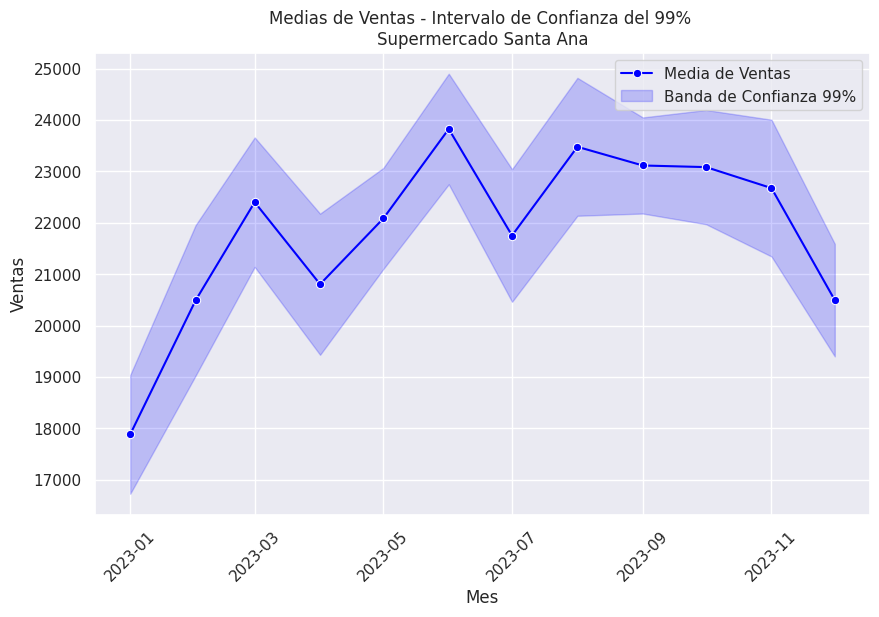

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_stats.index, y=monthly_stats['mean'], marker='o', color='blue', label='Media de Ventas')


plt.fill_between(monthly_stats.index,
                 monthly_stats['lower_99'],
                 monthly_stats['upper_99'],
                 color='blue', alpha=0.2, label='Banda de Confianza 99%')

plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.title('Medias de Ventas - Intervalo de Confianza del 99% \nSupermercado Santa Ana')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

*Tendencia General de Ventas*

Observando las medias de las ventas, se nota una tendencia de aumento en las ventas desde enero hasta junio, con un pico en junio (23,823.73 unidades). Luego, hay una ligera disminución, pero las ventas se mantienen relativamente altas y estables entre agosto y noviembre, antes de bajar nuevamente en diciembre, esto podría requerir una investigación más profunda para determinar las causas y tomar medidas correctivas en el futuro.

*Intervalos de Confianza del 95% y 99%*

Los intervalos de confianza al 99% son más amplios que los del 95%, lo que refleja una mayor certeza sobre la inclusión de la verdadera media de ventas.
Aunque ambos intervalos son útiles, el intervalo del 99% proporciona un rango más amplio y conservador, lo que podría ser útil en escenarios donde se necesita mayor confianza en las estimaciones.


# Ejercicio 2. Pruebas ANOVA

El objetivo de este ejercicio es determinar si las ventas esperadas de todas las tiendas son iguales o no. Para ello, se utilizará una prueba de **ANOVA (Análisis de Varianza)**.

La **ANOVA** es una técnica estadística que se utiliza para comparar las medias de tres o más grupos. En este caso, estamos comparando las medias de las ventas diarias entre cinco tiendas diferentes. La hipótesis nula de esta prueba establece que no hay diferencia significativa entre las medias de las tiendas, mientras que la hipótesis alternativa sugiere que al menos una tienda tiene un promedio de ventas diferente.


Para comenzar el análisis, se cargaron y combinaron los datos de ventas diarias de cada tienda. Luego, se añadió una columna que identifica la tienda correspondiente para cada registro de ventas.

In [56]:
# Leer todas las hojas del archivo de Excel
sheets = pd.read_excel(file_path, sheet_name=None)

# Cargar los datos de todas las tiendas en un solo DataFrame
data_santa_ana = sheets['Santa Ana']
data_la_floresta = sheets['La Floresta']
data_los_cedros = sheets['Los Cedros']
data_palermo = sheets['Palermo']
data_cordoba = sheets['Córdoba']

# Añadir una columna para identificar la tienda en cada DataFrame
data_santa_ana['Tienda'] = 'Santa Ana'
data_la_floresta['Tienda'] = 'La Floresta'
data_los_cedros['Tienda'] = 'Los Cedros'
data_palermo['Tienda'] = 'Palermo'
data_cordoba['Tienda'] = 'Córdoba'

# Unir todos los DataFrames en uno solo
combined_data = pd.concat([data_santa_ana, data_la_floresta, data_los_cedros, data_palermo, data_cordoba])
combined_data.head()

,Fecha,Ventas,Tienda
0,2023-01-01,16243.573114,Santa Ana
1,2023-01-02,18362.442131,Santa Ana
2,2023-01-03,15275.825306,Santa Ana
3,2023-01-04,20177.937740,Santa Ana
4,2023-01-05,20489.996198,Santa Ana


La hipótesis nula $H_0$ establece que no hay diferencias significativas en las medias de ventas entre las tiendas, mientras que la hipótesis alternativa $H_a$ sugiere que al menos una de las tiendas tiene un promedio de ventas diferente.


In [57]:
# Realizar la prueba ANOVA
# Esta función realiza una prueba ANOVA de un solo factor, que se utiliza para comparar las medias de dos o más grupos (en este caso, las ventas de cada tienda)
# La función toma como argumentos las series de datos de cada grupo que queremos comparar.
anova_result = stats.f_oneway(
    combined_data[combined_data['Tienda'] == 'Santa Ana']['Ventas'],
    combined_data[combined_data['Tienda'] == 'La Floresta']['Ventas'],
    combined_data[combined_data['Tienda'] == 'Los Cedros']['Ventas'],
    combined_data[combined_data['Tienda'] == 'Palermo']['Ventas'],
    combined_data[combined_data['Tienda'] == 'Córdoba']['Ventas']
)
anova_result


F_onewayResult(statistic=114.4505102185901, pvalue=3.8904025989851754e-87)


El valor estadístico **F** obtenido es de aproximadamente **114.45**, y el valor $p$ es extremadamente bajo (cerca de \(3.89 	imes 10^{-87}\)).

Dado que el valor $p$ es mucho menor que el nivel de significancia del 5% (0.05), se rechaza la hipótesis nula. Esto significa que hay diferencias significativas en las ventas promedio entre las tiendas. En otras palabras, al menos una de las tiendas tiene un comportamiento de ventas diferente en comparación con las otras.


# Ejercicio 3. Prueba de Hipótesis para Comparación de Ventas


A continuación, se identificó la tienda con el mayor promedio de ventas y la tienda con el menor promedio. Luego, se realizó una prueba de hipótesis para determinar si la diferencia entre los promedios de ventas es significativamente distinta de cero.

La hipótesis nula $H_0$ establece que no hay diferencia en las medias de ventas entre las dos tiendas, mientras que la hipótesis alternativa $H_a$ sugiere que existe una diferencia significativa entre las medias.


In [58]:
# Calcular el promedio de ventas para cada tienda
mean_sales_by_store = combined_data.groupby('Tienda')['Ventas'].mean()

# Identificar la tienda con mayor y menor promedio de ventas
max_store = mean_sales_by_store.idxmax()
min_store = mean_sales_by_store.idxmin()
max_mean = mean_sales_by_store.max()
min_mean = mean_sales_by_store.min()

# Mostrar resultados
max_store, max_mean, min_store, min_mean

('Santa Ana', 21842.402819070445, 'La Floresta', 18049.110514295746)


La tienda con el mayor promedio de ventas es **Santa Ana** con un promedio de aproximadamente 21,842.40 dólares, mientras que la tienda con el menor promedio de ventas es **La Floresta** con un promedio de aproximadamente 18,049.11 dólares.


In [59]:
# Extraer las ventas de las tiendas con mayor y menor promedio
sales_max_store = combined_data[combined_data['Tienda'] == max_store]['Ventas']
sales_min_store = combined_data[combined_data['Tienda'] == min_store]['Ventas']

# Realizar la prueba t para dos muestras independientes
t_test_result = stats.ttest_ind(sales_max_store, sales_min_store, equal_var=False)
t_test_result

TtestResult(statistic=16.226261754023362, pvalue=1.0156317860191493e-50, df=722.6031187104413)


El resultado de la prueba t muestra un valor estadístico t de aproximadamente 16.23 y un valor p extremadamente bajo (alrededor de \(1.02 	imes 10^{-50}\)).

Dado que el valor p es mucho menor que el nivel de significancia del 5% (0.05), se rechaza la hipótesis nula. Esto indica que la diferencia entre los promedios de ventas de las tiendas **Santa Ana** y **La Floresta** es significativa. Esto sugiere que la tienda **Santa Ana** tiene un rendimiento de ventas significativamente mejor que **La Floresta**.


# Ejercicio 4. Distribución a posteriori del parámetro $p$ de porcentaje de morosidad.
Distribución a posteriori del parámetro $p$ de porcentaje de morosidad. Determinar su media y su varianza.


En un proceso experimental de Bernouilli, el número de éxitos $k$ en $n$ pruebas independientes de resultado dicotómico A y no-A con $P(a)= \theta$ sigue una distribución binomial $B_0(n,\theta)$

Por lo tanto, dada una experiencia que arroja $k$ resultados positivos, la verosimilitud será:

$$
P(x|\theta) = \binom nk \theta^{k} (1-\theta)^{n-k} \qquad  (1)
$$

Ya que el termino combinatoria de $k$ en $n$, no depende de $\theta$, podemos incorporarlos en la constante de normalización.

$$
P(x|\theta) \propto \theta^{k} (1-\theta)^{n-k}
$$

A su vez, sabemos que la distribución a priori es una beta $ \beta (1, 4)$, lo cual coincide con la conjugada de la verosimilitud biniomial.

$$
p(\theta) \sim Beta(\alpha_0,\beta_0)
$$

$$
p(\theta)=\frac{\Gamma(\alpha_0)\Gamma(\beta_0)}{\Gamma(\alpha_0+\beta_0)} \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1} \qquad  (2)
$$

Podemos establecer la densidad a posteriori mediante la fórmula de Bayes:

$$
p(\theta|x) = \frac{p(\theta) p(x|\theta)}{\int_0^1 p(\theta)p(x|\theta)}
$$


Por lo tanto, a partir de (1) y (2), podemos despreciar todos los términos que no dependen de $\theta$, estableciendo que:

$$
p(\theta|x) \propto \theta^{k} (1-\theta)^{n-k} \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1} = \theta^{k + \alpha_0-1} (1-\theta)^{n-k+\beta_0-1}
$$

Lo cual define una distribución Beta con parámetros $\alpha_1$ y $\beta_1$ definidos por:

$$
p(\theta|x) \sim Beta(\alpha_1,\beta_1)
$$

$$
\alpha_1 = k + \alpha_0 \qquad \beta_1 = \beta_0 + n - k
$$


Con esto último, podemos establecer que la distribución a posteriori del parámetro $p$ de porcentaje de morosidad, es una distribución $\beta(3,11)$

Para calcular la media y la varianza de estas distribuciones podemos utilizar las expresiones de las mismias para una distribución Beta:

$$
E[X] = \frac{\alpha}{\alpha + \beta} \qquad V[X] = \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}
$$

Para la distribución a priori $\beta(1,4)$:

$$
E[X] = 0.2 \qquad V[X] = 0.0266
$$

Para la distribución a posteriori $\beta(3,11)$:

$$
E[X] = 0.214 \qquad V[X] = 0.011
$$


In [60]:
100 - 1.159/1.192*100

2.768456375838923

A Priori: Media: 0.2 - Varianza 0.02666666666666667 
 
A Posteriori: Media: 0.21428571428571427 - Varianza 0.011224489795918367 
 


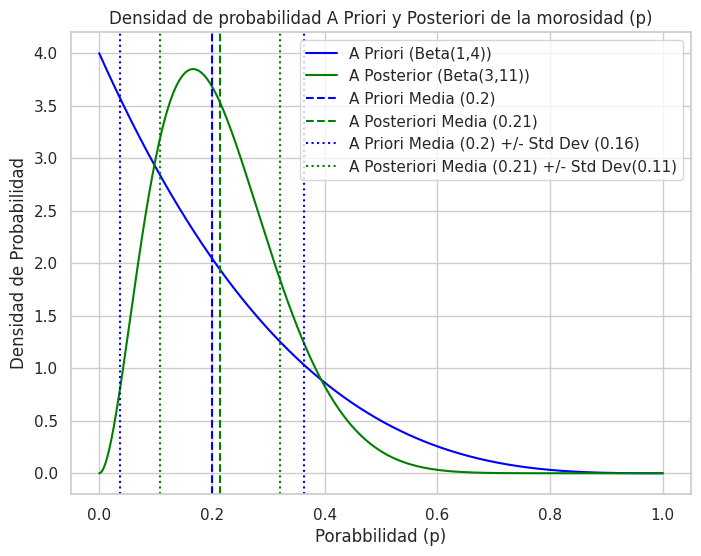

In [61]:
# Definir parametros
prior_alpha = 1
prior_beta = 4
posterior_alpha = 3
posterior_beta = 11

# Generar valores de x (500 puntos entre 0 y 1)
x = np.linspace(0, 1, 500)

# Distribuciones a priori y posteriori
prior_pdf = beta.pdf(x, prior_alpha, prior_beta)
posterior_pdf = beta.pdf(x, posterior_alpha, posterior_beta)

# Calcular media y varianza
prior_mean = prior_alpha / (prior_alpha + prior_beta)
prior_var = (prior_alpha * prior_beta) / ((prior_alpha + prior_beta)**2 * (prior_alpha + prior_beta + 1))
posterior_mean = posterior_alpha / (posterior_alpha + posterior_beta)
posterior_var = (posterior_alpha * posterior_beta) / ((posterior_alpha + posterior_beta)**2 * (posterior_alpha + posterior_beta + 1))

print('A Priori:',f'Media: {prior_mean} - Varianza {prior_var} \n ')

print('A Posteriori:',f'Media: {posterior_mean} - Varianza {posterior_var} \n ')

# Plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

plt.plot(x, prior_pdf, label='A Priori (Beta(1,4))', color='blue')
plt.plot(x, posterior_pdf, label='A Posterior (Beta(3,11))', color='green')

# Plot Media
plt.axvline(prior_mean, color='blue', linestyle='--', label=f'A Priori Media ({round(prior_mean,2)})')
plt.axvline(posterior_mean, color='green', linestyle='--', label=f'A Posteriori Media ({round(posterior_mean,2)})')

# Plor Varianza (stdev)
plt.axvline(prior_mean + np.sqrt(prior_var), color='blue', linestyle=':', label=f'A Priori Media ({round(prior_mean,2)}) +/- Std Dev ({round(np.sqrt(prior_var),2)})')
plt.axvline(prior_mean - np.sqrt(prior_var), color='blue', linestyle=':')
plt.axvline(posterior_mean + np.sqrt(posterior_var), color='green', linestyle=':', label=f'A Posteriori Media ({round(posterior_mean,2)}) +/- Std Dev({round(np.sqrt(posterior_var),2)})')
plt.axvline(posterior_mean - np.sqrt(posterior_var), color='green', linestyle=':')

# Labels y titulo
plt.xlabel('Porabbilidad (p)')
plt.ylabel('Densidad de Probabilidad')
plt.title('Densidad de probabilidad A Priori y Posteriori de la morosidad (p)')

plt.legend()

plt.grid(True)
plt.show()